In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch

In [2]:
housevalue = fch()

In [3]:
X = pd.DataFrame(housevalue.data)
X.head()
# 量纲不统一

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y = housevalue.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
X.shape

(20640, 8)

In [6]:
y.shape

(20640,)

In [8]:
y.max()

5.00001

In [9]:
y.min()

0.14999

In [10]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [11]:
X.columns = housevalue.feature_names

In [12]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

In [15]:
# 恢复索引
for i in [X_train, X_test]:
    i.index = range(i.shape[0])
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [16]:
X_train.shape

(14448, 8)

In [ ]:
# Nomalization
from sklean.preprocessing import StandardScaler


In [17]:
reg = LR().fit(X_train, y_train)
yhat = reg.predict(X_test)

In [18]:
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [19]:
yhat.min()

-0.6528439725035895

In [20]:
yhat.max() #yhat的值在y真实值范围外

7.146198214270882

In [21]:
# 查看系数
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [22]:
[*zip(X_train.columns, reg.coef_)]

[('MedInc', 0.43735893059684033),
 ('HouseAge', 0.010211268294494024),
 ('AveRooms', -0.10780721617317683),
 ('AveBedrms', 0.6264338275363768),
 ('Population', 5.216125353123053e-07),
 ('AveOccup', -0.003348509646333473),
 ('Latitude', -0.41309593789477156),
 ('Longitude', -0.4262109536208467)]

In [23]:
reg.intercept_

-36.25689322920383

In [ ]:
# 回归类算法的模型评估指标
1. 是否预测了正确的数值
MSE（RSS的变体MSE（均方误差mean squared error）： ）
MAE（绝对值误差 Mean absolute error）

In [25]:
# metrics里面的mean_squared_error
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat, y_test)  # 错误20%  一般来说，5%左右的误差可以接受

0.530901263932457

In [26]:
y_test.mean()

2.0819292877906976

In [28]:
# cross_val_score
cross_val_score(reg,X,y,cv=5,scoring="mean_squared_error")

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [30]:
# 看一下可用score
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [32]:
# "neg_mean_squared_error"   损失显示为负数
cross_val_score(reg,X,y,cv=5,scoring="neg_mean_squared_error").mean()

-0.5582901717686554

In [33]:
cross_val_score(reg,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-0.547496190786682

In [ ]:
# 2. R^2  表示模型捕获到的信息量占总体的比列。越接近1越好。

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat)

0.6043668160178818

In [36]:
r2 = reg.score(X_test, y_test)
r2

0.6043668160178818

In [37]:
cross_val_score(reg,X,y,cv=5,scoring="r2").mean()

0.5530311140279562

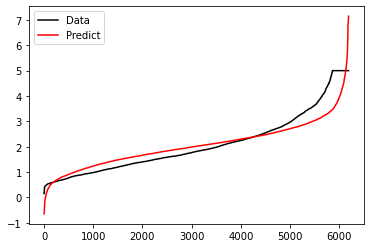

In [42]:
# 结论：模型拟合了比较好的数值，但是丢失了较多信息（没有很好拟合分布）
import matplotlib.pyplot as plt
plt.figure()

plt.plot(range(len(y_test)), sorted(y_test), c='black',label='Data')
plt.plot(range(len(yhat)), sorted(yhat), c='red',label='Predict')

plt.legend()
plt.show()